In [1]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt 

from regression_utils import *

np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
# convention followed in relation to scikit documentation 
# y = countryQuantity 
# y1 = countryQuantityTrain
# Y = countryQuantityTest
# y_pred = countryQuantityPredict

# X = years 
# X1 = yearsTrain
# x_mis = yearsTest
# x = yearsPredict

# c = combinedZip

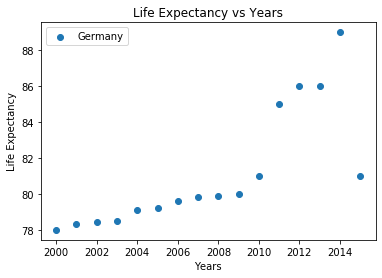

Train:Test split is:  12 : 4


In [3]:
#reading data from csv 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')

# Quantity variation of 3 countries (Germany, Netherlands, Spain)
# change here 
country = 'Germany'
countryDF = countryDF(country, df)
countryQuantity = columnExtractor(countryDF,'Life expectancy')

years = columnExtractor(countryDF,'Year')
#plotQuantities(years, countryQuantity,'Years','Population', country,'Population vs Years')
plotQuantities(years, countryQuantity, 'Years', 'Life Expectancy', country, 'Life Expectancy vs Years')

split = np.random.randint(1,15)
countryQuantityTrain, yearsTrain, countryQuantityTest, yearsTest = randomizer(countryQuantity, years, split)


length scale is:  8


/home/mihir/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


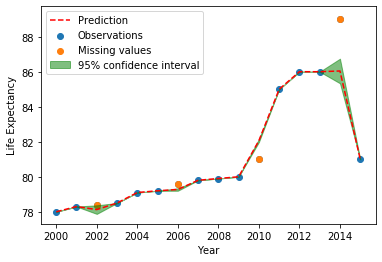

In [4]:
countryQuantityPredict, sigma = gaussianRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity) 

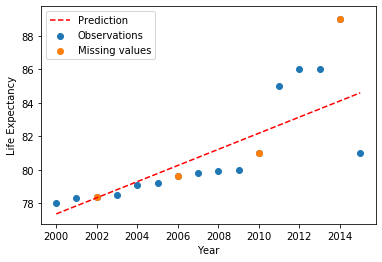

In [5]:
countryQuantityPredictLR = linearRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity)

GPR Prediction 
 [[78.         78.3        78.12419257 78.5        79.1        79.2
  79.27126214 79.8        79.9        80.         82.06424263 85.
  86.         86.         86.04114315 81.        ]]
Actual 
 [78.0, 78.3, 78.4, 78.5, 79.1, 79.2, 79.6, 79.8, 79.9, 80.0, 81.0, 85.0, 86.0, 86.0, 89.0, 81.0]
GPR error:  [[0.         0.         0.35179519 0.         0.         0.
  0.41298726 0.         0.         0.         1.31387979 0.
  0.         0.         3.32455826 0.        ]]
mean absolute percentage error GPR :  0.33770128126408666
------------------------------------------
LR Prediction 
 [[77.36185567 77.8443299  78.32680412 78.80927835 79.29175258 79.7742268
  80.25670103 80.73917526 81.22164948 81.70412371 82.18659794 82.66907216
  83.15154639 83.63402062 84.11649485 84.59896907]]
Actual 
 [78.0, 78.3, 78.4, 78.5, 79.1, 79.2, 79.6, 79.8, 79.9, 80.0, 81.0, 85.0, 86.0, 86.0, 89.0, 81.0]
LR error  [[0.81813376 0.58195415 0.09336209 0.39398516 0.24241792 0.72503384
  0.8250013 

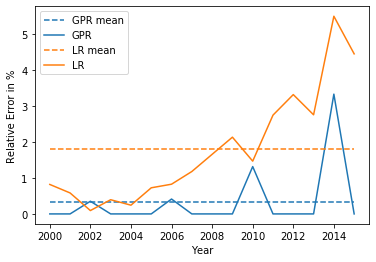

In [6]:
# error computation for GPR 
years = columnExtractor(countryDF,'Year').tolist()
error = errorComputation(countryDF, countryQuantityPredict, 'Life expectancy',regression_type='GPR')
print('GPR error: ',error)
errorPlot(years, error, 'Year', 'Relative Error in %',regression_type='GPR',color='#1f77b4')

print('------------------------------------------')

years = columnExtractor(countryDF,'Year').tolist()
error = errorComputation(countryDF, countryQuantityPredictLR, 'Life expectancy',regression_type='LR')
print('LR error ',error)
errorPlot(years, error, 'Year', 'Relative Error in %',regression_type='LR',color='#ff7f0e')

plt.show()